### Imports

In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import random

### Loading the dataset

Dataset can be found at: https://www.kaggle.com/datasets/ardamavi/27-class-sign-language-dataset

In [4]:
X = np.load("../dataset/X.npy")
y = np.load("../dataset/Y.npy")

### Dataset shapes

In [5]:
X.shape

(22801, 128, 128, 3)

In [6]:
y.shape

(22801, 1)

##### Number of instances

In [7]:
n_instances = X.shape[0]
print(f'Number of instances in the dataset is {n_instances}.')

Number of instances in the dataset is 22801.


##### Number of classes and their values

In [8]:
classes_names = np.unique(y)
n_classes = len(classes_names)
print(f'Number of classes is {n_classes}.', f'Their labels are {classes_names}.', sep='\n')

Number of classes is 27.
Their labels are ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'NULL' 'a' 'b' 'bye' 'c' 'd' 'e'
 'good' 'good morning' 'hello' 'little bit' 'no' 'pardon' 'please'
 'project' 'whats up' 'yes'].


### Visualizing few instances and their labels

##### Generating $k$ random numbers from $0, ..., n\_instances $ to visualize $k$ instances from the dataset

In [23]:
k = 33

In [25]:
indices = random.sample(range(n_instances), k)
print(indices)

[9429, 12770, 15160, 91, 7296, 6714, 5003, 4976, 4, 17827, 6150, 6667, 19358, 73, 3818, 7440, 3363, 4727, 6655, 22302, 21056, 22416, 8832, 18083, 4880, 12198, 6166, 10658, 3514, 20499, 20613, 21884, 17466]


##### Visualizing k instances 

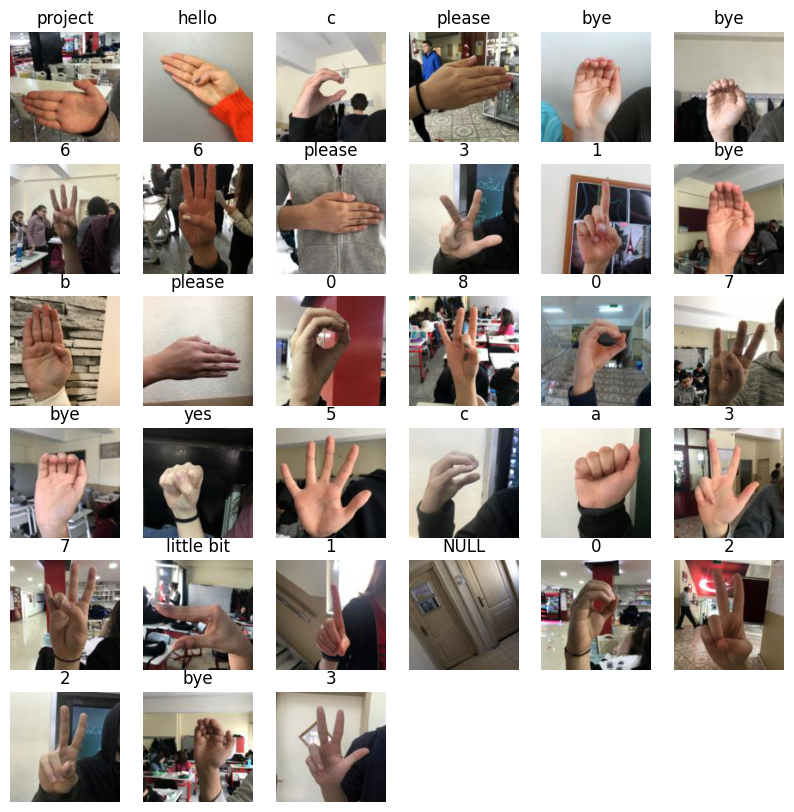

In [27]:
plt.figure(figsize=(10, 10))

for i in range(k):
    plt.subplot(int(np.ceil(np.sqrt(k))), int(np.ceil(np.sqrt(k))), i + 1)
    plt.imshow(X[indices[i]])
    plt.title(y[indices[i]][0])
    plt.axis('off')

plt.show()

### Number of instances per class
##### Checking if dataset is well balanced

In [35]:
y_series = pd.Series(np.ravel(y))
class_counts = y_series.value_counts()
class_counts

b               866
0               866
please          865
whats up        865
2               865
3               865
d               865
c               865
good morning    865
yes             865
hello           865
little bit      865
good            865
5               865
pardon          865
project         865
8               865
bye             865
1               865
6               865
7               865
9               865
no              865
4               864
a               863
e               863
NULL            314
Name: count, dtype: int64

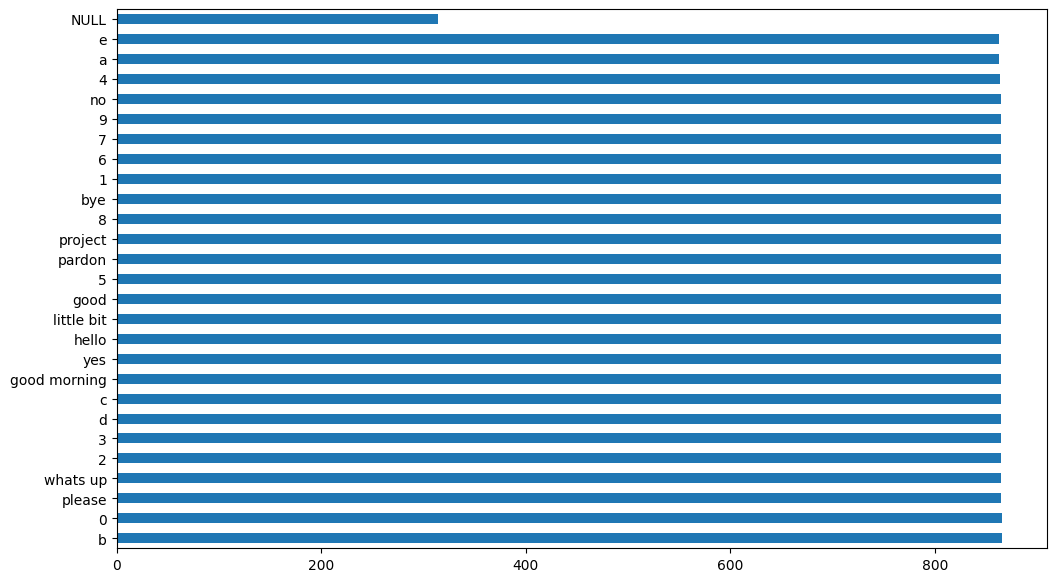

In [46]:
plt.figure(figsize=(12,7))
class_counts.plot(kind='barh')

plt.show()